In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

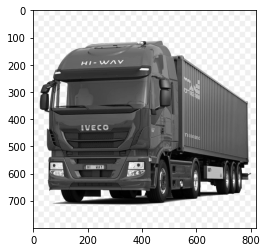

In [24]:
image_color = mpimg.imread("/content/truckrr.jpg")
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [25]:
height, width = image_gray.shape[:2]
print("Height: "+str(height)+", Width: "+str(width))

Height: 800, Width: 820


In [27]:
image_color_save = cv2.imwrite("truck_color.jpg", image_color)
new_image_color = mpimg.imread("/content/truck_color.jpg") 

In [28]:
image_save = cv2.imwrite("truck_grey.jpg", image_gray)
new_image_gray = mpimg.imread("/content/truck_grey.jpg") 

# Perform Feature Detection

## Canny Method

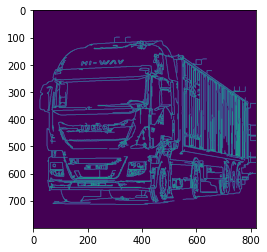

In [29]:
threshold_1 = 5
threshold_2 = 500

image_canny = cv2.Canny(new_image_gray, threshold_1, threshold_2, apertureSize = 3)
plt.imshow(image_canny)

## FAST Method

Number of keypoints Detected:  5128


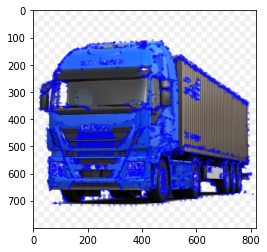

In [30]:
# Create FAST Detector object
fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(new_image_color, None)
# fast.setNonmaxSuppression(False)

print ("Number of keypoints Detected: ", len(keypoints))

image = cv2.drawKeypoints(new_image_color, keypoints, None, color = (0,0,255))
# image = cv2.drawKeypoints(image_color, keypoints, None)


plt.imshow(image)

## ORB Method

Number of keypoints Detected:  500


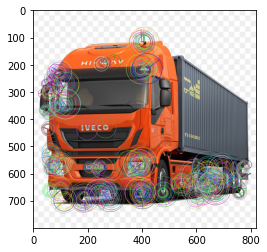

In [31]:
# Create ORB object, we can specify the number of key points we desire
orb = cv2.ORB_create()

# Determine key points
keypoints = orb.detect(new_image_gray, None)

# Obtain the descriptors
keypoints, descriptors = orb.compute(new_image_gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image_color, keypoints,None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(image)